In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        274 non-null    int64  
 1   Kontras0          274 non-null    float64
 2   Dissimilarity0    274 non-null    float64
 3   Homogenitas0      274 non-null    float64
 4   Entropi0          274 non-null    float64
 5   ASM0              274 non-null    float64
 6   Energy0           274 non-null    float64
 7   Correlation0      274 non-null    float64
 8   Kontras45         274 non-null    float64
 9   Dissimilarity45   274 non-null    float64
 10  Homogenitas45     274 non-null    float64
 11  Entropi45         274 non-null    float64
 12  ASM45             274 non-null    float64
 13  Energy45          274 non-null    float64
 14  Correlation45     274 non-null    float64
 15  Kontras90         274 non-null    float64
 16  Dissimilarity90   274 non-null    float64
 1

In [3]:
data.head(7)

,Unnamed: 0,Kontras0,Dissimilarity0,Homogenitas0,Entropi0,ASM0,Energy0,Correlation0,Kontras45,Dissimilarity45,...,Energy90,Correlation90,Kontras135,Dissimilarity135,Homogenitas135,Entropi135,ASM135,Energy135,Correlation135,label
0,0,322.490327,11.895585,0.117549,12.085720,0.000317,0.017798,0.384205,558.050391,16.138070,...,0.019686,0.389982,521.527589,15.381456,0.096639,12.202201,0.000284,0.016849,0.370180,jijik
1,1,478.728671,12.619048,0.137871,11.979005,0.000466,0.021585,0.351351,611.213404,15.185185,...,0.023073,0.365765,688.045603,15.822373,0.107917,12.095421,0.000378,0.019437,0.339381,jijik
2,2,667.329117,13.858383,0.128990,12.145574,0.000273,0.016515,0.340146,932.338120,18.818342,...,0.016145,0.349267,930.179390,18.221718,0.096775,12.318455,0.000234,0.015310,0.322571,jijik
3,3,320.839038,10.083085,0.184475,11.750907,0.000405,0.020115,0.213300,442.327286,12.604938,...,0.022122,0.216096,481.495591,13.260771,0.126296,11.946753,0.000335,0.018296,0.205256,jijik
4,4,305.479911,9.889633,0.181551,11.737353,0.000407,0.020165,0.218854,436.560847,12.477198,...,0.021070,0.221171,459.195515,12.876039,0.133949,11.953875,0.000333,0.018235,0.211021,jijik
5,5,291.983631,10.658730,0.128022,12.019649,0.000317,0.017792,0.517666,489.467372,14.219703,...,0.021477,0.527211,500.878055,14.087931,0.104414,12.102531,0.000296,0.017215,0.503127,jijik
6,6,262.843502,9.172867,0.170550,11.535915,0.000473,0.021739,0.229606,419.807760,13.024187,...,0.019954,0.238470,414.098010,12.907785,0.114476,11.848126,0.000342,0.018481,0.219360,jijik


In [4]:
data.groupby("label").describe().T

label                     jijik       marah      normal      sedih      senang
Unnamed: 0     count  55.000000   54.000000   55.000000  55.000000   55.000000
               mean   27.000000  136.500000  246.000000  82.000000  191.000000
               std    16.020820   15.732133   16.020820  16.020820   16.020820
               min     0.000000  110.000000  219.000000  55.000000  164.000000
               25%    13.500000  123.250000  232.500000  68.500000  177.500000
...                         ...         ...         ...        ...         ...
Correlation135 min     0.090963    0.094687    0.095613   0.087822    0.100381
               25%     0.155988    0.141233    0.187317   0.156610    0.162371
               50%     0.239212    0.242188    0.209814   0.237661    0.221207
               75%     0.326580    0.355168    0.391732   0.355491    0.300661
               max     0.519553    0.547001    0.583479   0.538739    0.595858

[232 rows x 5 columns]

In [6]:
print(data["label"].value_counts())
new_val ={
    "label" : {
        "jijik" : 1,
        "marah" : 2,
        "normal" : 3,
        "sedih" : 4,
        "senang" : 5,
    },
}
# new_data = data.join(pd.get_dummies(data["label"]))
new_data =  data.replace(new_val)
new_data = new_data.drop(columns=["Unnamed: 0"])
new_data.head(10)

sedih     55
senang    55
jijik     55
normal    55
marah     54
Name: label, dtype: int64


,Kontras0,Dissimilarity0,Homogenitas0,Entropi0,ASM0,Energy0,Correlation0,Kontras45,Dissimilarity45,Homogenitas45,...,Energy90,Correlation90,Kontras135,Dissimilarity135,Homogenitas135,Entropi135,ASM135,Energy135,Correlation135,label
0,322.490327,11.895585,0.117549,12.085720,0.000317,0.017798,0.384205,558.050391,16.138070,0.092127,...,0.019686,0.389982,521.527589,15.381456,0.096639,12.202201,0.000284,0.016849,0.370180,1
1,478.728671,12.619048,0.137871,11.979005,0.000466,0.021585,0.351351,611.213404,15.185185,0.117870,...,0.023073,0.365765,688.045603,15.822373,0.107917,12.095421,0.000378,0.019437,0.339381,1
2,667.329117,13.858383,0.128990,12.145574,0.000273,0.016515,0.340146,932.338120,18.818342,0.081731,...,0.016145,0.349267,930.179390,18.221718,0.096775,12.318455,0.000234,0.015310,0.322571,1
3,320.839038,10.083085,0.184475,11.750907,0.000405,0.020115,0.213300,442.327286,12.604938,0.151605,...,0.022122,0.216096,481.495591,13.260771,0.126296,11.946753,0.000335,0.018296,0.205256,1
4,305.479911,9.889633,0.181551,11.737353,0.000407,0.020165,0.218854,436.560847,12.477198,0.153235,...,0.021070,0.221171,459.195515,12.876039,0.133949,11.953875,0.000333,0.018235,0.211021,1
5,291.983631,10.658730,0.128022,12.019649,0.000317,0.017792,0.517666,489.467372,14.219703,0.104603,...,0.021477,0.527211,500.878055,14.087931,0.104414,12.102531,0.000296,0.017215,0.503127,1
6,262.843502,9.172867,0.170550,11.535915,0.000473,0.021739,0.229606,419.807760,13.024187,0.100266,...,0.019954,0.238470,414.098010,12.907785,0.114476,11.848126,0.000342,0.018481,0.219360,1
7,372.448413,10.937500,0.148811,11.915398,0.000337,0.018360,0.264401,639.036029,15.827160,0.106387,...,0.018810,0.266358,675.434114,16.080625,0.102438,12.171888,0.000271,0.016456,0.250993,1
8,305.801587,9.804563,0.193062,11.701733,0.000423,0.020576,0.214155,426.220459,12.268330,0.161196,...,0.022002,0.216010,467.353238,12.782817,0.142151,11.917120,0.000344,0.018534,0.206191,1
9,329.342510,10.168403,0.181070,11.782126,0.000396,0.019902,0.208064,464.173091,12.647266,0.153254,...,0.021285,0.211986,479.876039,13.060217,0.141876,11.944092,0.000348,0.018660,0.201227,1


In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kontras0          274 non-null    float64
 1   Dissimilarity0    274 non-null    float64
 2   Homogenitas0      274 non-null    float64
 3   Entropi0          274 non-null    float64
 4   ASM0              274 non-null    float64
 5   Energy0           274 non-null    float64
 6   Correlation0      274 non-null    float64
 7   Kontras45         274 non-null    float64
 8   Dissimilarity45   274 non-null    float64
 9   Homogenitas45     274 non-null    float64
 10  Entropi45         274 non-null    float64
 11  ASM45             274 non-null    float64
 12  Energy45          274 non-null    float64
 13  Correlation45     274 non-null    float64
 14  Kontras90         274 non-null    float64
 15  Dissimilarity90   274 non-null    float64
 16  Homogenitas90     274 non-null    float64
 1

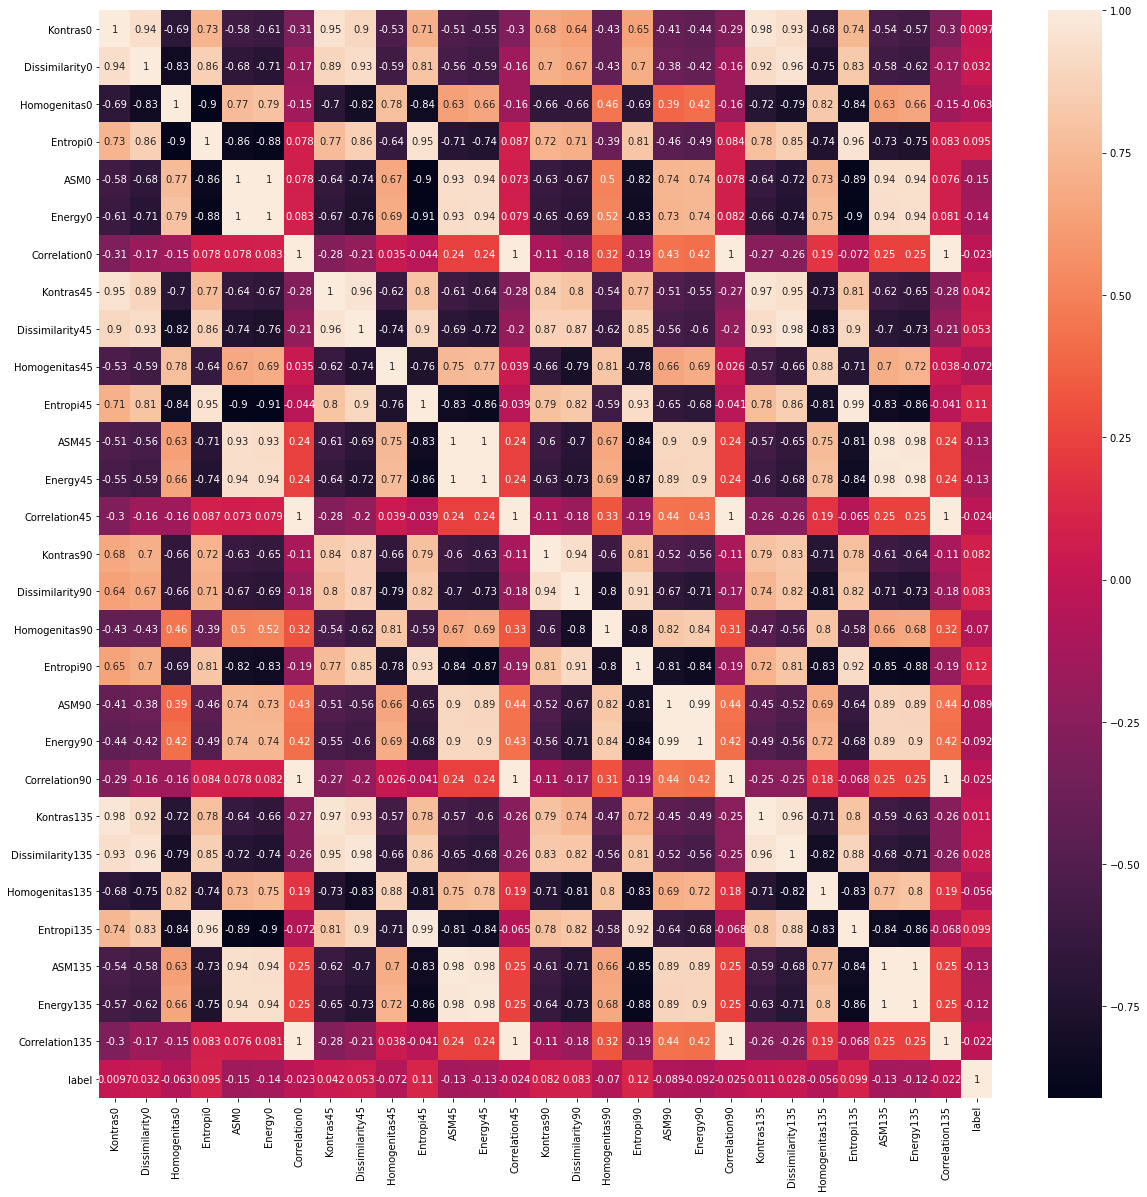

In [8]:
plt.figure(figsize=(20,20))
sb.heatmap(new_data.corr(), annot=True)

In [9]:
x = new_data.iloc[:,:28]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kontras0          274 non-null    float64
 1   Dissimilarity0    274 non-null    float64
 2   Homogenitas0      274 non-null    float64
 3   Entropi0          274 non-null    float64
 4   ASM0              274 non-null    float64
 5   Energy0           274 non-null    float64
 6   Correlation0      274 non-null    float64
 7   Kontras45         274 non-null    float64
 8   Dissimilarity45   274 non-null    float64
 9   Homogenitas45     274 non-null    float64
 10  Entropi45         274 non-null    float64
 11  ASM45             274 non-null    float64
 12  Energy45          274 non-null    float64
 13  Correlation45     274 non-null    float64
 14  Kontras90         274 non-null    float64
 15  Dissimilarity90   274 non-null    float64
 16  Homogenitas90     274 non-null    float64
 1

In [10]:
y = new_data.iloc[:,-1:]
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   274 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

sc = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_scalled = sc.fit_transform(x_train)
x_test_scalled = sc.transform(x_test)

In [12]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
comps = [i for i in range(2,24)]
scores = []
ks = [5,7,8,10]

for k in ks:
    col = []
    for n_components in comps:
        pca = PCA(n_components = n_components)
        x_train_pca = pca.fit_transform(x_train_scalled)
        x_test_pca = pca.transform(x_test_scalled)

        knn = KNN(n_neighbors = k)
        knn.fit(x_train_pca, y_train)

        col.append(knn.score(x_test_pca, y_test))
    scores.append(col)

<ipython-input-12-20d83c521255>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train_pca, y_train)
<ipython-input-12-20d83c521255>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train_pca, y_train)
<ipython-input-12-20d83c521255>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train_pca, y_train)
<ipython-input-12-20d83c521255>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train_pca, y_train)
<ipython-input-12-20d83c521255>:15: DataConversionWarning: A column-vector y was passed when a 1d array 

In [13]:
scores  = np.array(scores)

In [14]:
df = pd.DataFrame()
df["k"] = ks

df2 = pd.DataFrame(scores, columns=comps)
result = pd.concat([df,df2], axis = 1)
result.head().T

,0,1,2,3
k,5.000000,7.000000,8.000000,10.000000
2,0.363636,0.327273,0.363636,0.254545
3,0.436364,0.381818,0.363636,0.290909
4,0.436364,0.345455,0.309091,0.290909
5,0.490909,0.345455,0.272727,0.272727
6,0.490909,0.400000,0.309091,0.290909
7,0.545455,0.436364,0.290909,0.309091
8,0.563636,0.418182,0.290909,0.309091
9,0.563636,0.400000,0.327273,0.327273
10,0.563636,0.418182,0.327273,0.327273
